---
# KARM

Un problème d' __optimisation__

Fabrice Mulotti
Licence MIT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from os import path
import sys


## Définissons les paramètres de notre environnement

In [2]:
K=5 # nombre de bras
recompense_centre=5 # récompense moyenne
dispersion_recompense=4 # écart par rapport à la moyenne
dispersion_resultat_par_bras=2.0 # facteur pour l`écart type appliqué à chaque bras lors des tirages


## Déterminer pour chaque bras sa récompense moyenne et l'écart type

In [3]:
np.random.seed(seed=42)
recompense_moyenne_bras = np.random.random(K)*dispersion_recompense+5
ecart_type_bras = (np.random.random(K)+0.5)*dispersion_resultat_par_bras

In [4]:
recompense_moyenne_bras

array([6.49816048, 8.80285723, 7.92797577, 7.39463394, 5.62407456])

In [5]:
reference = np.flip(np.argsort(recompense_moyenne_bras))
print(f"Ordre des bras décroissant {reference}")

Ordre des bras décroissant [1 2 3 0 4]


In [6]:
ecart_type_bras

array([1.31198904, 1.11616722, 2.73235229, 2.20223002, 2.41614516])

In [7]:
## Visualisons sur 10000 tirages à  quoi ressemble les 

In [8]:
np.random.seed(2023)
tirage=10000
sample = np.zeros((tirage,K))
for i in range(K):
    for j in range(tirage):
        sample[j,i]=np.random.normal(recompense_moyenne_bras[i],ecart_type_bras[i])

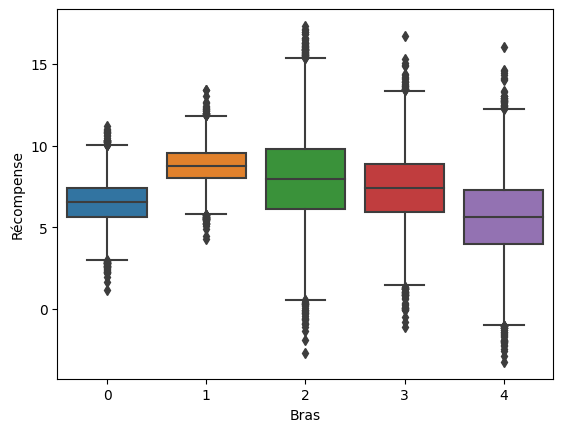

In [9]:
plt.figure()
sbn.boxplot(sample)
plt.xlabel("Bras")
plt.ylabel("Récompense")
plt.show()

![boxplots.jpg](static/boxplots.jpg)

***
## Functions et classes

### Pour être capable comparer nos résultats, nous allons utiliser un Dataframe pandas

In [10]:
def tirage(bras):
    # tirage pour un bras
    # entrée : numéro du bras
    # sortie : récompense pour un tirage
    return np.random.normal(recompense_moyenne_bras[bras],ecart_type_bras[bras])

---
## Round Robin

Dans une approche Round Robin, on tire un même nombre de fois chaque bras.
C'est donc une approche 'brute'.

In [11]:
# Ecrire une fonction qui renvoie les numéros de bras alternativement
# exmeple 0 -> 1 -> 2 -> 3 -> 4 -> 0 ......

def RoundRobinPolicy(action,K):
    # Round robin policy : tire un bras l'un après l'autre
    # input : mode = 0 : reinitialise, 1 : tire et incrémente, K nombre de bras
    # output : numéro de bras

    # VOTRE CODE

    return (action+1) % K


A tester avec __100__, __1000__ et __10000__ tirages.
Que constate t on ?

In [12]:
np.random.seed(2023)
nombre_tirage=200

# conserver cet appel pour la suite pour comparer les résultats
# nombre de bras , valeur initial de la moyenne des récompenses, nom de la politique
result = []
action = -1

for i in range(nombre_tirage):
    action = RoundRobinPolicy(action,K)
    reward = tirage(action)
    result.append(reward)

    

In [13]:
result[0:10]

[7.431868347630945,
 8.440677752859905,
 5.190512231866764,
 7.914912528474073,
 5.377241556129524,
 5.000797058616593,
 11.765619610351418,
 11.864216668989643,
 7.612439485995557,
 -1.9180002280073136]

In [14]:
result_round_robin  = np.cumsum(result)

In [15]:
result_round_robin[0:10]

array([ 7.43186835, 15.8725461 , 21.06305833, 28.97797086, 34.35521242,
       39.35600948, 51.12162909, 62.98584575, 70.59828524, 68.68028501])

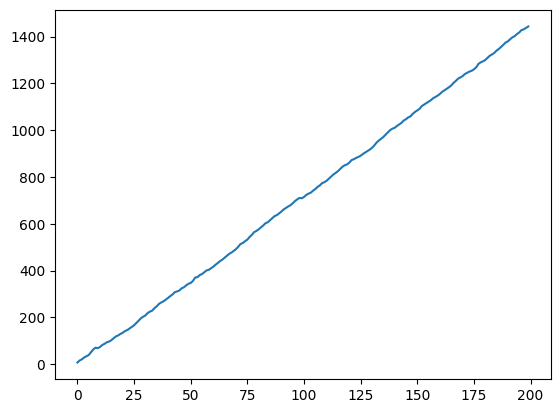

In [16]:
plt.figure()
plt.plot(result_round_robin)
plt.show()

---
# Greedy - valeur initiale élévée<br>
Avec une politique Greedy, notre algorithme choisi toujours le bras qui offre le meilleur rendement.

Donc si on a pas évalué au préalable les bras, et dans un environnement stable, il n'y a pas d'intérêt.


In [17]:
def mean_reward(Q,N):
    return np.divide(Q,N,where=N>0)

In [18]:
def greedyPolicy(num_action, mean_reward_per_arm):
    # purpose : choisi le bras qui rapporte le plus
    # input : nombre de bras, moyenne de résultat connu par bras.
    # output : bras choisi

    # votre code
    action = np.argmax(mean_reward_per_arm)
    return action

In [19]:
np.random.seed(2023)
nombre_tirage=200

Q=np.full((K),10)
N=np.full((K),1)

result = []
for i in range(nombre_tirage):
    action=greedyPolicy(K,mean_reward(Q,N))
    reward=tirage(action)
    Q[action] += reward
    N[action] += 1
    result.append(reward)
    # print(mean_reward(Q,N))


In [20]:
N

array([  7, 191,   2,   3,   2])

In [21]:
10 10 10
15/2=7 10 10
7 10+8=18/2=9 10
7 9 10+2=12/2=6
7 9 6

SyntaxError: invalid syntax (3578464555.py, line 1)

In [22]:
# stocker le résultat dans un tableau avec cumul
result_greedy_optimiste = np.cumsum(result)

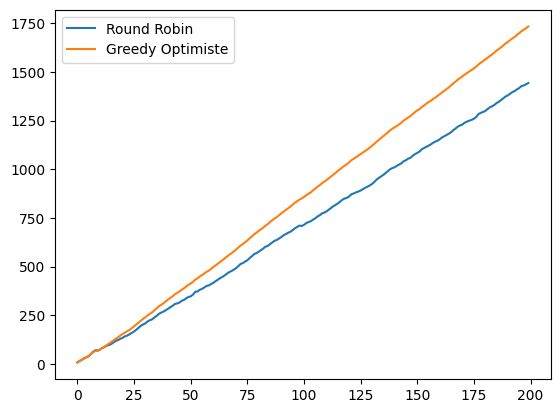

In [23]:
# comparer les courbes
plt.figure()
plt.plot(result_round_robin,label="Round Robin")
plt.plot(result_greedy_optimiste,label="Greedy Optimiste")
plt.legend()
plt.show()

***
## e-Greedy

e-Greedy (epsilon-glouton) choisit l'action réputée la plus payante selon une probabilité 1-epsilon ou aléatoire selon une probabilité epsilon.

Il va intéressant de jouer avec les deux paramètres :<br>
__epsilon__<br>
__la valeur initiale__<br>

A noter que dès 1000 tirage, egreedy a trouver 100% des bras par ordre de rendement

In [24]:
def egreedyPolicy(num_action,epsilon,mean_reward_per_arm):

    # votre code
    r=np.random.uniform()
    if r<epsilon:
        return np.random.randint(num_action)
    
    return(np.argmax(mean_reward_per_arm))

In [25]:
np.random.seed(2023)
nombre_tirage=200
epsilon=0.10

result=[]
N=np.zeros((K))
Q=np.zeros((K))

for i in range(nombre_tirage):
    action= egreedyPolicy(K,epsilon,mean_reward(Q,N))
    reward = tirage(action)
    Q[action] += reward
    N[action] += 1
    result.append(reward)    


In [26]:
# stocker le résultat dans un tableau avec cumul
result_egreedy=np.cumsum(result)

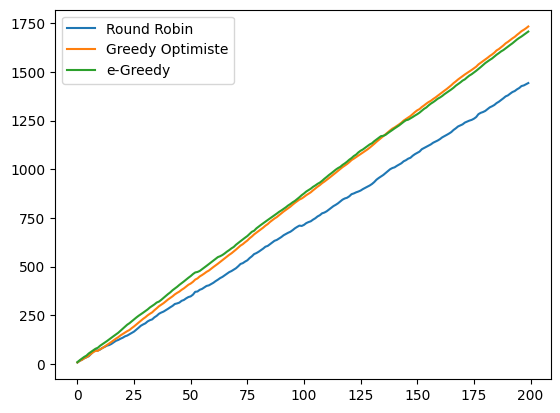

In [27]:
# comparer les courbes
plt.figure()
plt.plot(result_round_robin,label="Round Robin")
plt.plot(result_greedy_optimiste,label="Greedy Optimiste")
plt.plot(result_egreedy,label="e-Greedy")
plt.legend()
plt.show()

---
# espilon greedy decay

Nous avons 3 paramètres :<br>
Nstep 
Epsilon max
Epsilon min

In [28]:
np.random.seed(2023)
nombre_tirage=200
epsilonMax=0.50
epsilonMin=0.05
NbPas=100
result=[]

Q = np.zeros((K))
N = np.zeros((K))

eps=list()

epsilon=epsilonMax
for i in range(nombre_tirage):
    action= egreedyPolicy(K,epsilon,mean_reward(Q,N))
    reward = tirage(action)
    result.append(reward)
    
    eps.append(epsilon)
    
    Q[action] += reward
    N[action] +=1
    # asjustement d'epsilon
    # voir cours
    r = max((NbPas - i)/NbPas,0)
    epsilon = (epsilonMax - epsilonMin) * r +epsilonMin



In [29]:
# stocker le résultat dans un tableau avec cumul
result_egreedy_decay=np.cumsum(result)

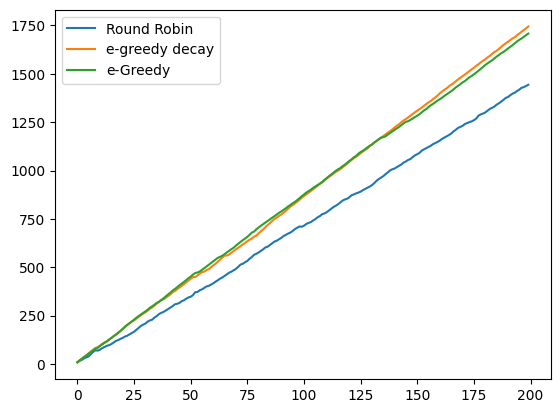

In [30]:
# comparer les courbes
plt.figure()
plt.plot(result_round_robin,label="Round Robin")
plt.plot(result_egreedy_decay,label="e-greedy decay")
plt.plot(result_egreedy,label="e-Greedy")
plt.legend()
plt.show()

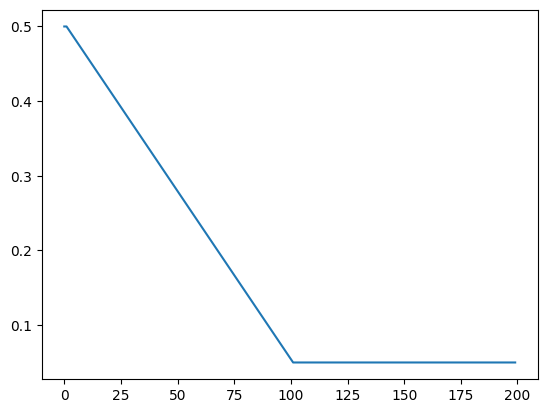

In [31]:
plt.figure()
plt.plot(eps)
plt.show()

In [32]:
result_egreedy[-1]

1707.8403715728218

In [33]:
result_egreedy_decay[-1]

1744.6290426593725

---
# LinUCB

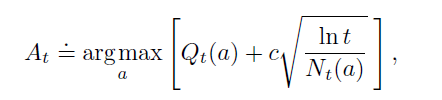

In [34]:
def linUCBPolicy(mean_reward_arm,arm_usage, c , num_tirage):
    # input
    # mean_reward_arm : récompense moyenne par bras
    # arm_usage : nombre d'utilisation pour tous les bras 
    # c : hyperparamètre
    # num_tirage : numero de tirage de notre exprérience
    
    # votre code
    
    return np.argmax(mean_reward_arm + c *np.square((np.log(num_tirage+1)/(arm_usage+1))))

In [35]:
np.random.seed(2023)
nombre_tirage=200

Q=np.zeros((K))
N=np.zeros((K))

result=[]
c=0.2

for i in range(nombre_tirage):
    action= linUCBPolicy(mean_reward(Q,N),N,c,i)
    reward = tirage(action)
    Q[action] += reward
    N[action] += 1
    result.append(reward)   
    


In [36]:
np.log(i)/(N+1)

array([5.29330482, 0.02728508, 1.32332621, 1.32332621, 2.64665241])

In [37]:
mean_reward(Q,N)

array([5.29330482, 8.79930132, 6.79359195, 7.71855558, 4.84007181])

In [38]:
# stocker le résultat dans un tableau avec cumul
result_linUCB=np.cumsum(result)

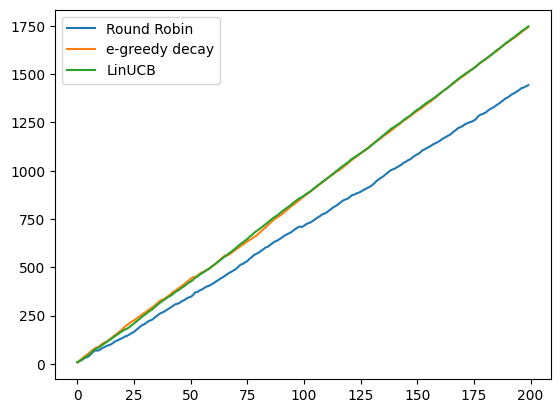

In [39]:
# comparer les courbes
# comparer les courbes
plt.figure()
plt.plot(result_round_robin,label="Round Robin")
plt.plot(result_egreedy_decay,label="e-greedy decay")
plt.plot(result_linUCB,label="LinUCB")
plt.legend()
plt.show()

---
# Méthode du gradient

![static/gradient.png](static/gradient.png)

Soit H notre tableau des préférences

In [ ]:
def gradientPolicy(H):
    return np.argmax(H)
   

def updatePreference(H,moyenneR,num_tirage,action,reward):
    # en entrée : tableau des préférences H, moyenne des récompenses (baseline), numéro de tirage,a ction choisie et récompense
    # en sortie : tablea H actualisé, nouvelle baseline ajustée
    return H , moyenneR                                      
    

In [ ]:
np.random.seed(2023)
H=np.zeros((K))
nombre_tirage=100

alpha=0.5
gradientExp = Experiment(K,nombre_tirage,0.0,f"gradient-alpha-{alpha}")
moyenneR=5

for i in range(nombre_tirage):
    action=gradientPolicy(H)
    reward = tirage(action)
    gradientExp.record_result(action,reward)
    # mise à jour des préférences
    H,moyenneR = updatePreference(H,moyenneR,i,action, reward)

gradientExp.print_score()
tools.graphResult(nombre_tirage)

In [ ]:
# stocker le résultat dans un tableau avec cumul

In [ ]:
# comparer les courbes